In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sborn

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
#imports for data preparation

In [2]:
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

#### Features:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


| Name        | Description |
| ----------- | ----------- |
| Timestamp   | The (Unix-)Timestamp of the respective Value       |
| Open        | The opening Price of this period        |
| High        | The highest Price of this period        |
| Low         | The lowest Price of this period         |
| Close       | The closing Price of this period        |
| Volume_(BTC)| The Volume in BTC traded in this period        |
| Volume_(Currency)| The Volume of Currency that has been traded in this period       |
| Weighted_Price   | The Weighted Price of this period      |

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are too much Nan values

In [5]:
df.isnull().sum(axis = 0)

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

For every column about 1,2 million of 4,8 million

Fix this with the interpolate method from pandas with the method: linear

In [6]:
df.interpolate(method="nearest", inplace=True)

In [7]:
totalNull = df.isnull().sum(axis = 0).sum()
totalLen  = len(df)
print("Total NaN values:"+ str(totalNull) + ", Total length: "+str(totalLen))

Total NaN values:0, Total length: 4857377


Now it is better, but there are still about 4,8 million values.

Create a new row only with the current date in days.  
Take the mean of every day to make the data more convenient to use (4,8 million minutes should be approx. 3370 days)

In [8]:
#Converting Timestamp to "normal" date:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Date'] = df['Timestamp'].dt.date

df_day = df.groupby("Date").mean() 

In [9]:
len(df_day)

3376

Now only the 3376 Days/Values are left and summed up by the daily mean
Create a Heatmap to look at the correlation of the different columns

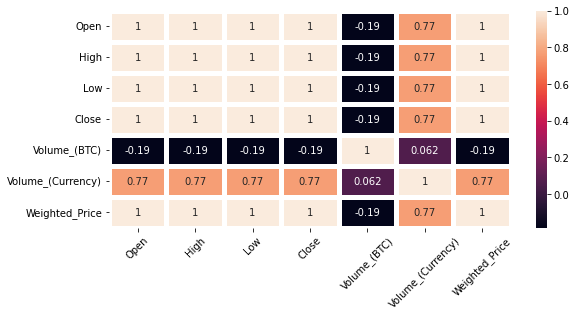

In [10]:
f ,axis = plt.subplots(figsize=(9, 4))
sborn.heatmap(df_day.corr(), annot=True, linewidths=5,ax=axis) #  fmt= '.1f',

plt.xticks(rotation= 45) 
plt.show()

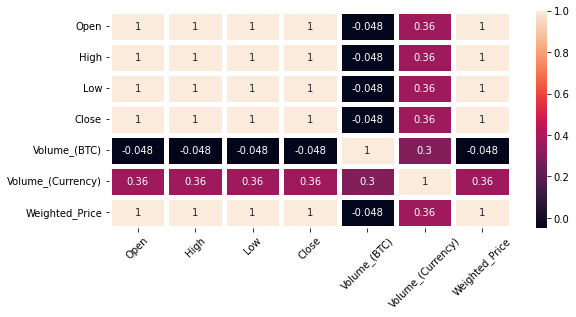

In [11]:
f ,axis = plt.subplots(figsize=(9, 4))
sborn.heatmap(df.corr(), annot=True, linewidths=5,ax=axis) #  fmt= '.1f',

plt.xticks(rotation= 45) 
plt.show()

Here it can be seen, that Open, High, Low, Close fully correlate with Weighted Price.  
It does not make a difference whether using one of the OHLC or Weighted_Price.  

In [39]:
df_Weighted_Price = df_day.Weighted_Price
df_Weighted_Price

Date
2011-12-31        4.477370
2012-01-01        4.765486
2012-01-02        5.000000
2012-01-03        5.225903
2012-01-04        5.201707
                  ...     
2021-03-27    55192.261999
2021-03-28    55833.580482
2021-03-29    56910.369124
2021-03-30    58346.019783
2021-03-31    58764.349363
Name: Weighted_Price, Length: 3376, dtype: float64

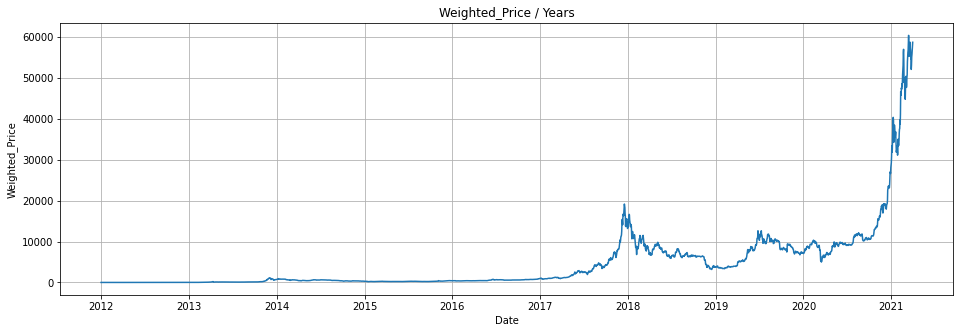

In [43]:
plt.figure(figsize=(16, 5))
plt.title("Weighted_Price / Years")
plt.xlabel("Time (in Years)")
plt.ylabel("Weighted_Price")
df_Weighted_Price.plot(grid=True)
plt.show()

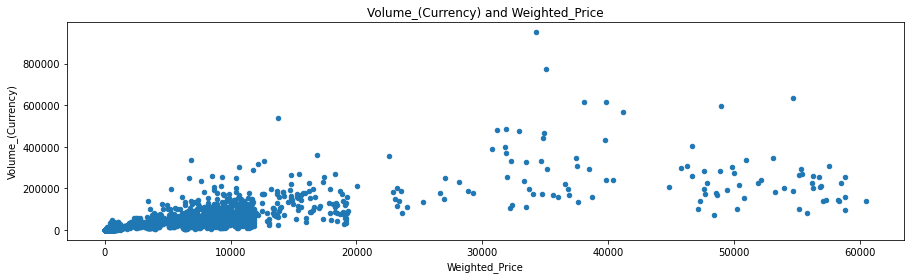

In [49]:
df_day.plot(kind="scatter", x="Close", y="Volume_(Currency)", figsize=(15,4) )
plt.title("Volume_(Currency) and Weighted_Price")
plt.xlabel("Weighted_Price")
plt.ylabel("Volume_(Currency)")
plt.show()

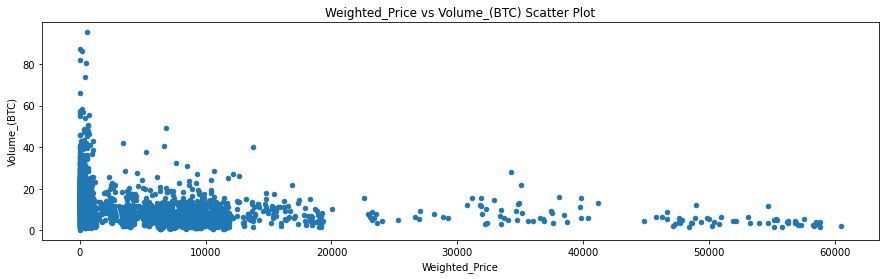

In [50]:
df_day.plot(kind="scatter", x="Weighted_Price", y="Volume_(BTC)", figsize=(15,4) )
plt.xlabel("Weighted_Price")
plt.ylabel("Volume_(BTC)")
plt.title("Weighted_Price vs Volume_(BTC) Scatter Plot")
#plt.figure(figsize=(11,2))
plt.show()

Here it can be seen the relationship between the Weighted_Price and Volume_(BTC).  
When the Price goes up, the Volume traded decreases.

In [51]:
df_day.to_csv('./data/daily_dataframe.csv', index=False)